In [1]:
import tensorflow as tf
from keras import models
from keras.preprocessing import image
import cv2 
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
model = models.load_model('seg11_mbnV3SGD.h5')

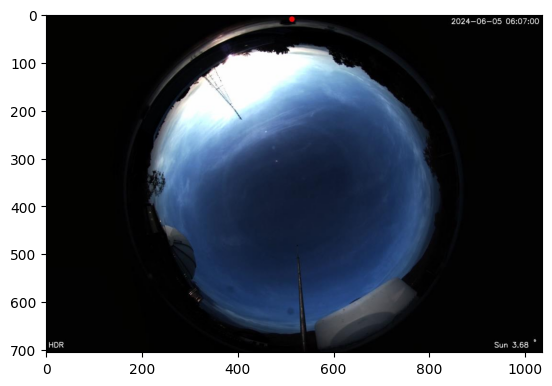

In [62]:
image = cv2.imread(r'All_sky_camera_Astropark_Chaingmai\2024-06-05\638531392334243904.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)

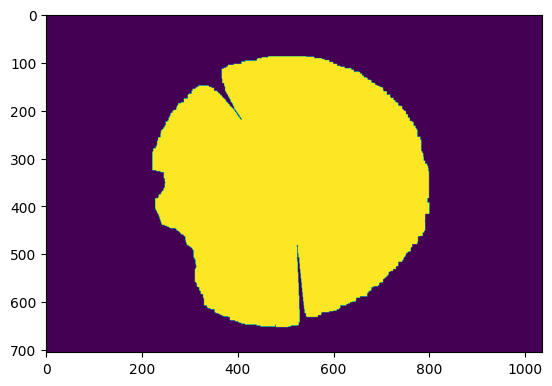

In [63]:
mask = cv2.imread('mask_delete_5.png',cv2.IMREAD_GRAYSCALE)

plt.imshow(mask)

(705, 1036, 3)


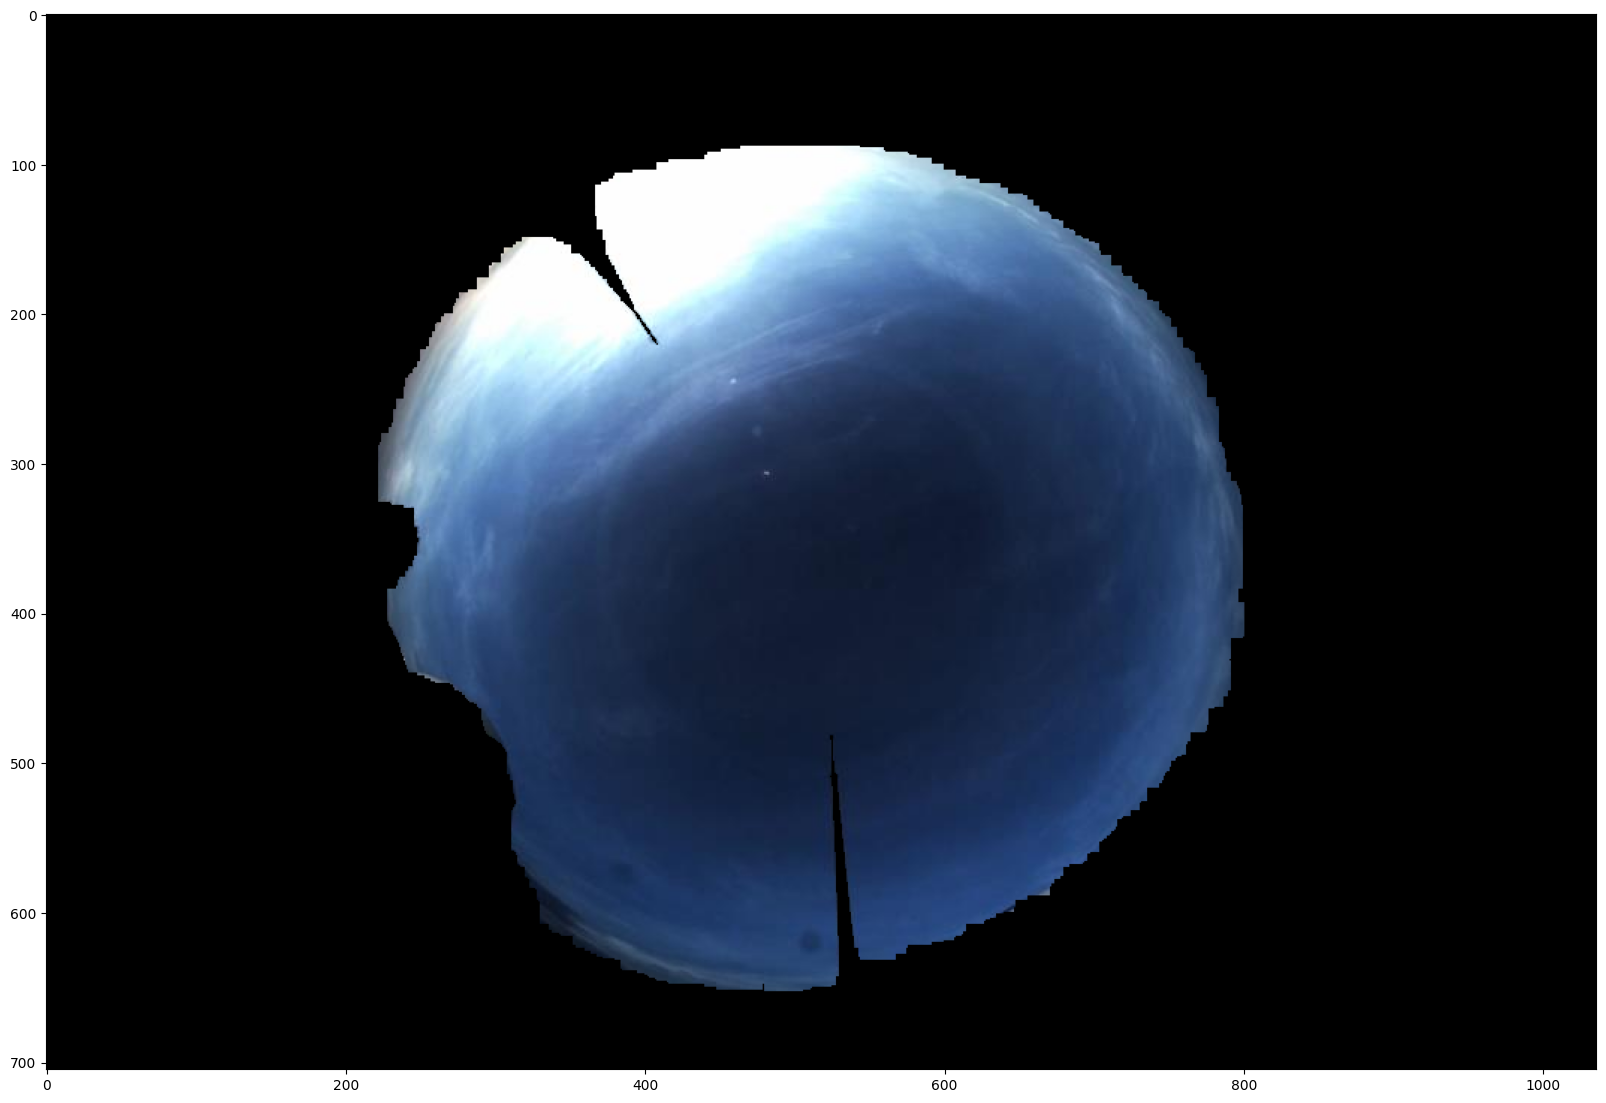

In [64]:
clear_bg = cv2.bitwise_and(image,image,mask=mask)

plt.figure(figsize=(20,20))
plt.imshow(clear_bg)

print(image.shape)

(540, 570, 3)


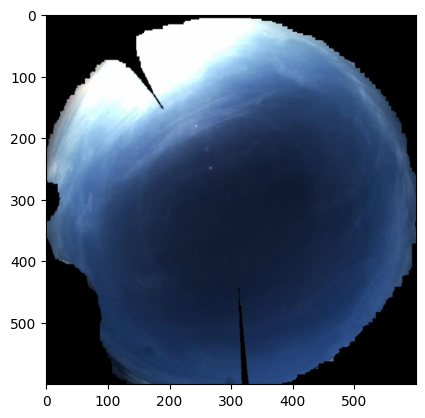

In [65]:
crop_test = clear_bg[(int(image.shape[0]/2)-270):int((image.shape[0]/2)+270),int((image.shape[1]/2)-290):int((image.shape[1]/2)+280)]
print(crop_test.shape)
crop_test = cv2.resize(crop_test,(600,600))
plt.imshow(crop_test)

1/1 [==============================] - 0s 53ms/step


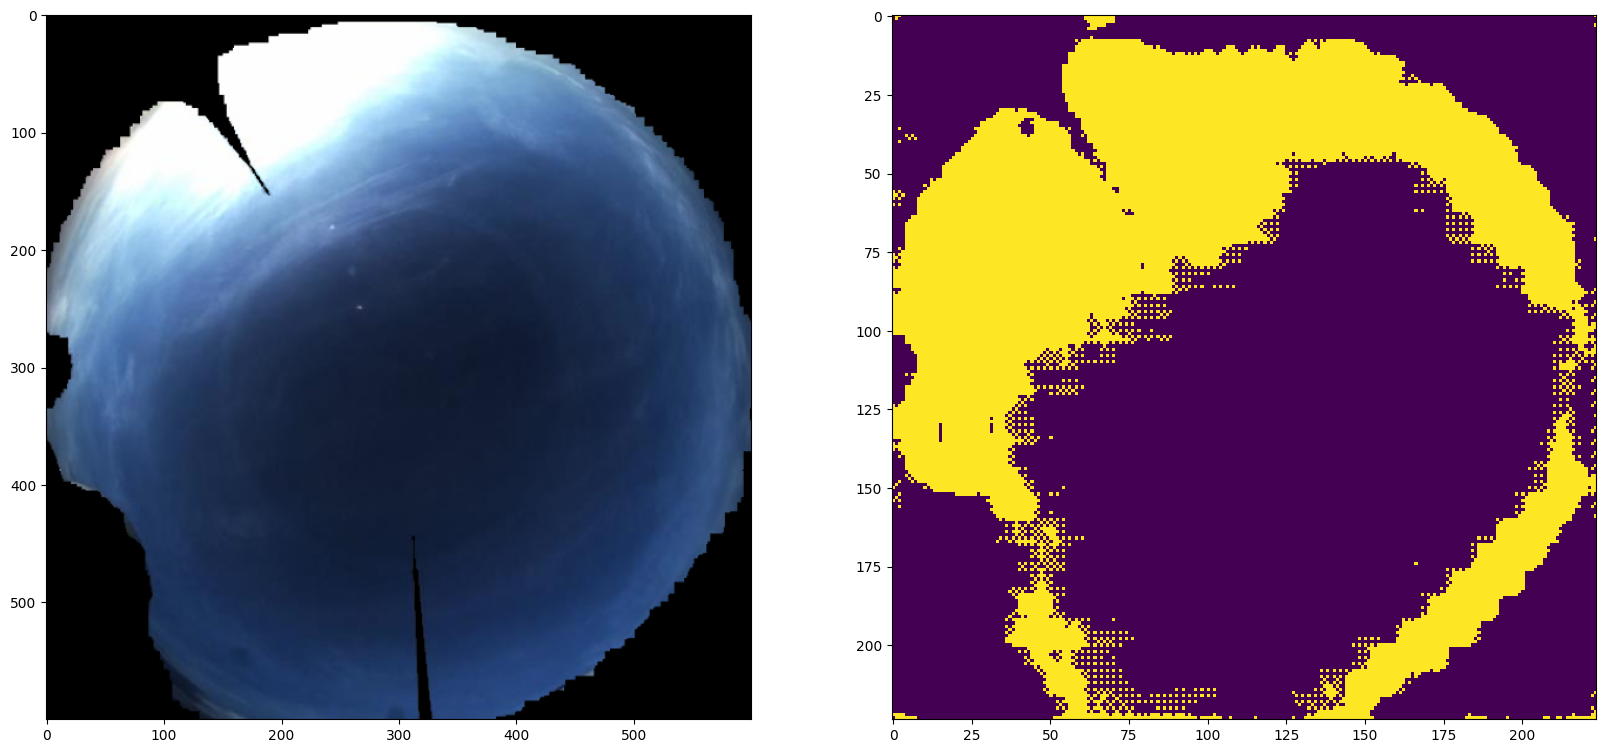

In [66]:
def load_and_preprocess_image(image, target_size=(224, 224)):
    # Load the image using OpenCV
    image = image
    
    # Check if the image was loaded successfully
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded")
    
    # Convert the image to RGB (OpenCV loads images in BGR format)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Resize the image to the target size
    image = cv2.resize(image, target_size)
    
    # Convert the image to a tensor and normalize it to [0, 1]
    image = tf.convert_to_tensor(image, dtype=tf.float32) / 255.0
    
    # Add a batch dimension
    image = tf.expand_dims(image, axis=0)
    
    return image

preprocessed_image = load_and_preprocess_image(crop_test)

prediction = model.predict(preprocessed_image)
prediction = np.squeeze(prediction, axis=0)  # Remove batch dimension

# Display the prediction
if prediction.shape[-1] == 1:
    predicted_mask = np.squeeze(prediction, axis=-1)  # For single-channel mask
else:
    predicted_mask = np.argmax(prediction, axis=-1)  # For multi-class mask

# Display the prediction using OpenCV
predicted_mask = (predicted_mask * 255).astype(np.uint8)

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(crop_test)
plt.subplot(1,2,2)
plt.imshow(predicted_mask)


In [67]:
lower_bl = np.asarray([30,20,10])
upper_bl = np.asarray([70,95,110])

mask_bl = cv2.inRange(crop_test,lower_bl,upper_bl)
_,mask_bl = cv2.threshold(mask_bl,127,255,cv2.THRESH_BINARY)

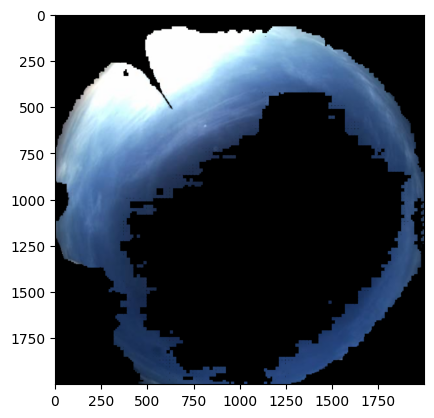

In [68]:
show = clear_bg[(int(image.shape[0]/2)-270):int((image.shape[0]/2)+270),int((image.shape[1]/2)-290):int((image.shape[1]/2)+280)]
mask_predict = cv2.resize(predicted_mask,(2000,2000))
show = cv2.resize(show,(2000,2000))
mask_ai = cv2.bitwise_and(show,show,mask=mask_predict)

plt.imshow(mask_ai)

In [81]:
model_pred = tf.keras.models.load_model('sky_status_model.h5')

In [82]:
mask_pred = cv2.resize(crop_test,(125,125))

mask_pred = tf.expand_dims(mask_pred, axis=0)

In [83]:
predict_sky = model_pred.predict(mask_pred)[0]
np.asarray(predict_sky)

1/1 [==============================] - 0s 113ms/step


array([7.5815415e-01, 4.9467597e-02, 1.4818217e-05, 1.1087071e-02,
       2.6995260e-03], dtype=float32)

In [84]:
print(f"prediction : class number {c}")

prediction : class number 1


In [85]:
print("Cloud coverage :",cv2.countNonZero(cv2.cvtColor(mask_ai,cv2.COLOR_RGB2GRAY))/cv2.countNonZero(cv2.cvtColor(show,cv2.COLOR_RGB2GRAY)))

Cloud coverage : 0.49103191293212856


In [86]:
r,g,b = cv2.split(mask_ai)

r_nz = r[r != 0]
g_nz = g[g != 0]
b_nz = b[b != 0]

mean = np.mean(b_nz)
var  = np.std(b_nz)
Drb  = np.mean(b_nz)-np.mean(r_nz)

print("Mean (b channel;) :",mean)
print("Standard diviation (b channel):",var)
print("Different (R-B) :",Drb)

Mean (b channel;) : 164.79069074261412
Standard diviation (b channel): 58.83419008193432
Different (R-B) : 63.69656334166825
